In [73]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [44]:
Netflix = pd.read_csv('/home/ngiacomelli/Documentos/IA_CHALLENGE_EDA/netflix_daily_top 10.csv')

In [45]:
df_Netflix = pd.DataFrame(Netflix)

In [46]:
df_Netflix.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [47]:
df_Netflix.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


In [48]:
df_Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [49]:
df_Netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [50]:
print(df_Netflix.dtypes)

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object


## PERIODO DA ANALISE

In [51]:
df_periodo = pd.to_datetime(df_Netflix['As of'])

In [52]:
df_periodo.head()

0   2020-04-01
1   2020-04-01
2   2020-04-01
3   2020-04-01
4   2020-04-01
Name: As of, dtype: datetime64[ns]

In [53]:
df_periodo.min()

Timestamp('2020-04-01 00:00:00')

In [54]:
df_periodo.max()

Timestamp('2022-03-11 00:00:00')

Analise foi feita de 01 de abril de 2020 até dia 11 de março de 2022

## TAMANHO DO DATAFRAM

In [55]:
df_Netflix.shape

(7100, 10)

10 colunas com 7100 linhas de dados cada

## VERIFICAR DADOS NULOS

In [56]:
df_Netflix.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

Coluna Netflix Exclusive possui 2501 itens nulos

In [57]:
df_Netflix[(df_Netflix['Netflix Exclusive'] == 'No')]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score


Valores nulos da coluna netflix exclusive indicam que o produto não é exclusivo da netflix, pode-se imputar os valores nulos como "No"

In [58]:
df_Netflix['Netflix Exclusive'].fillna('No', inplace=True)

/tmp/ipykernel_39808/1731910538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Netflix['Netflix Exclusive'].fillna('No', inplace=True)


## VERIFICANDO OUTLIERS

<Axes: >

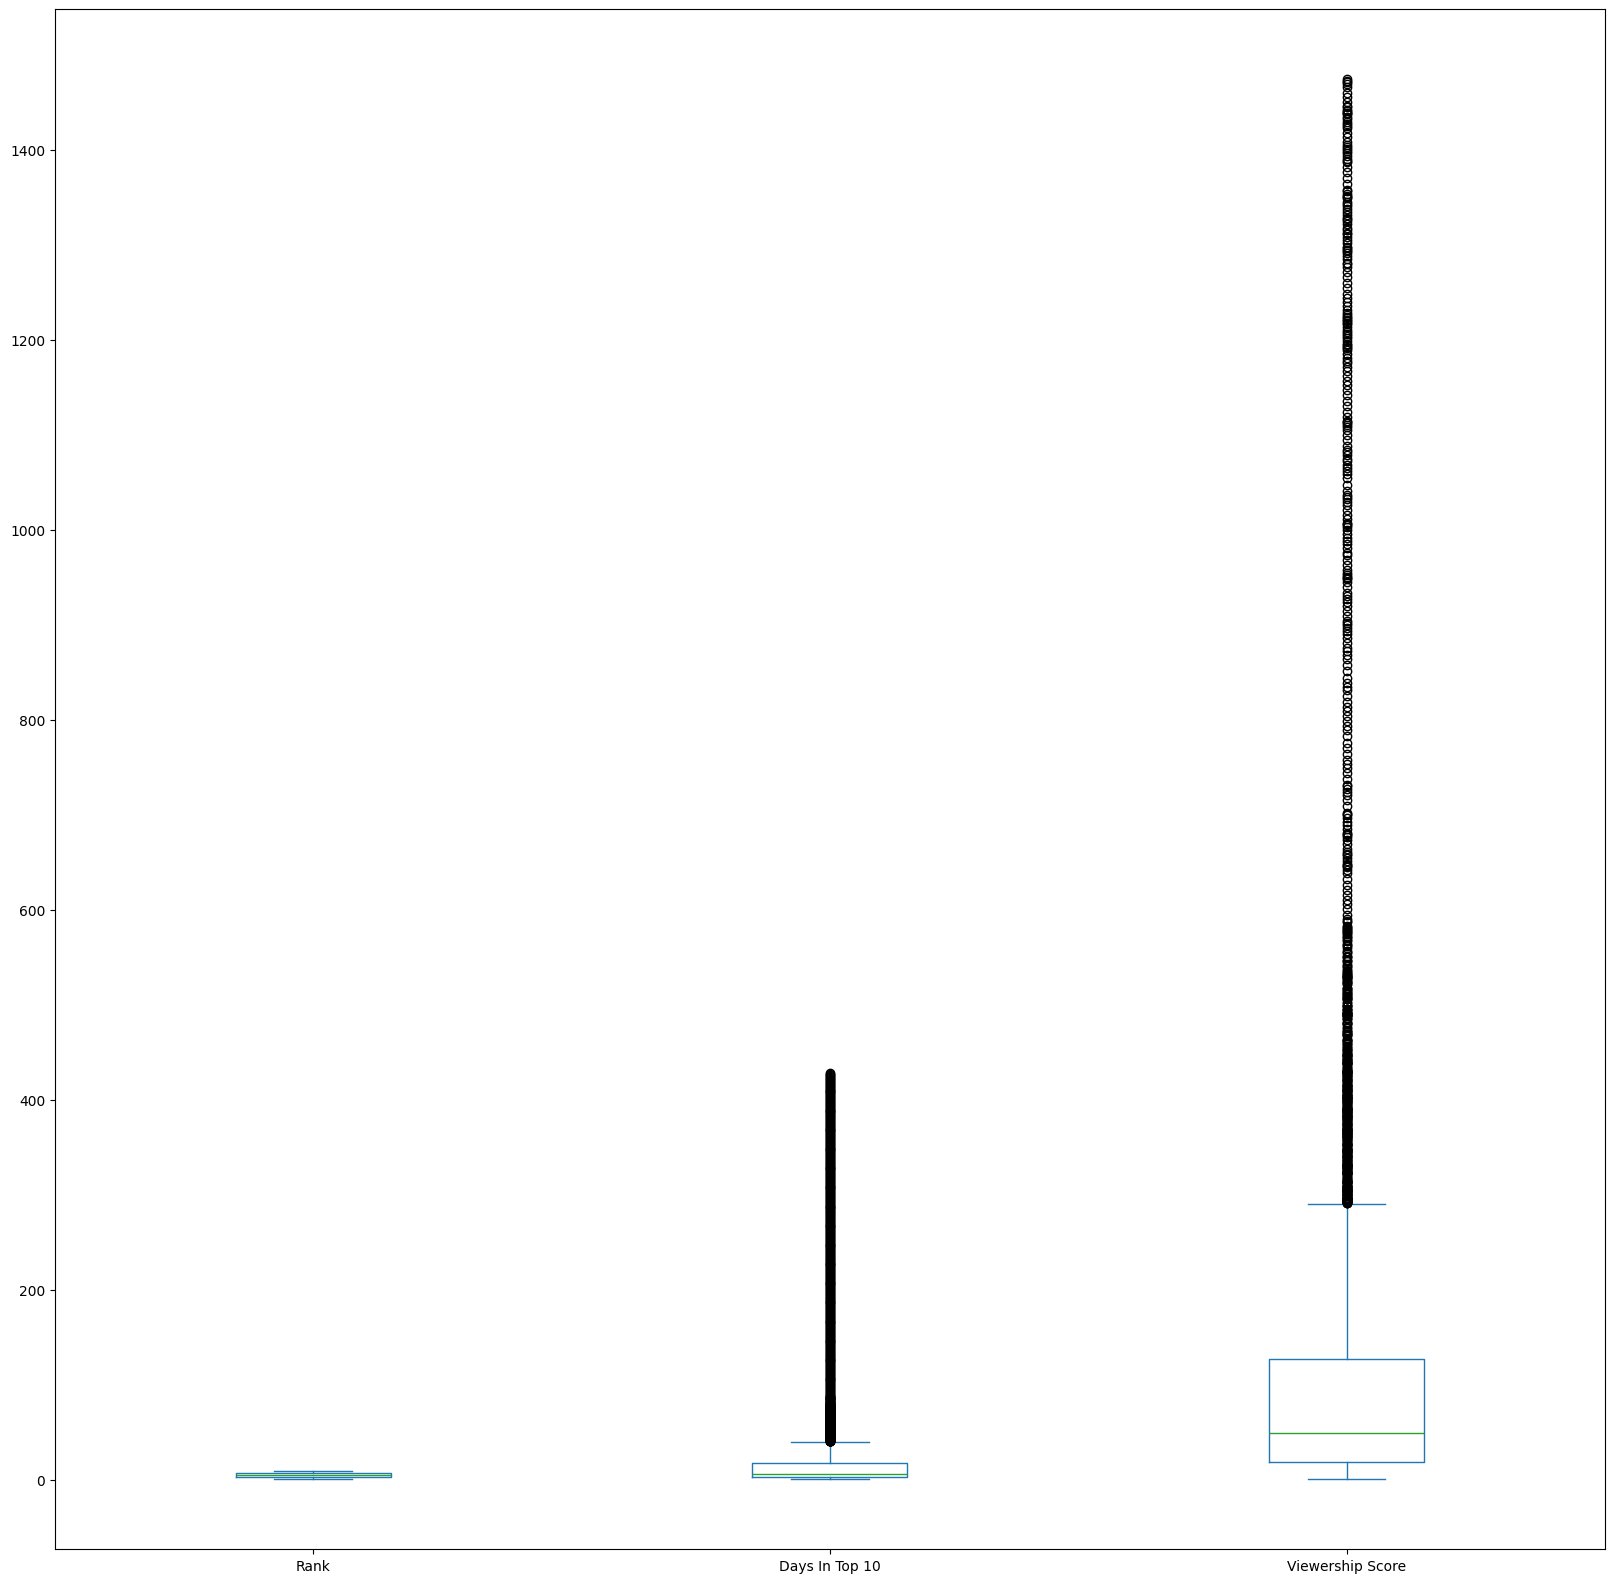

In [59]:
df_Netflix.plot.box(figsize=(20,20))

<Axes: >

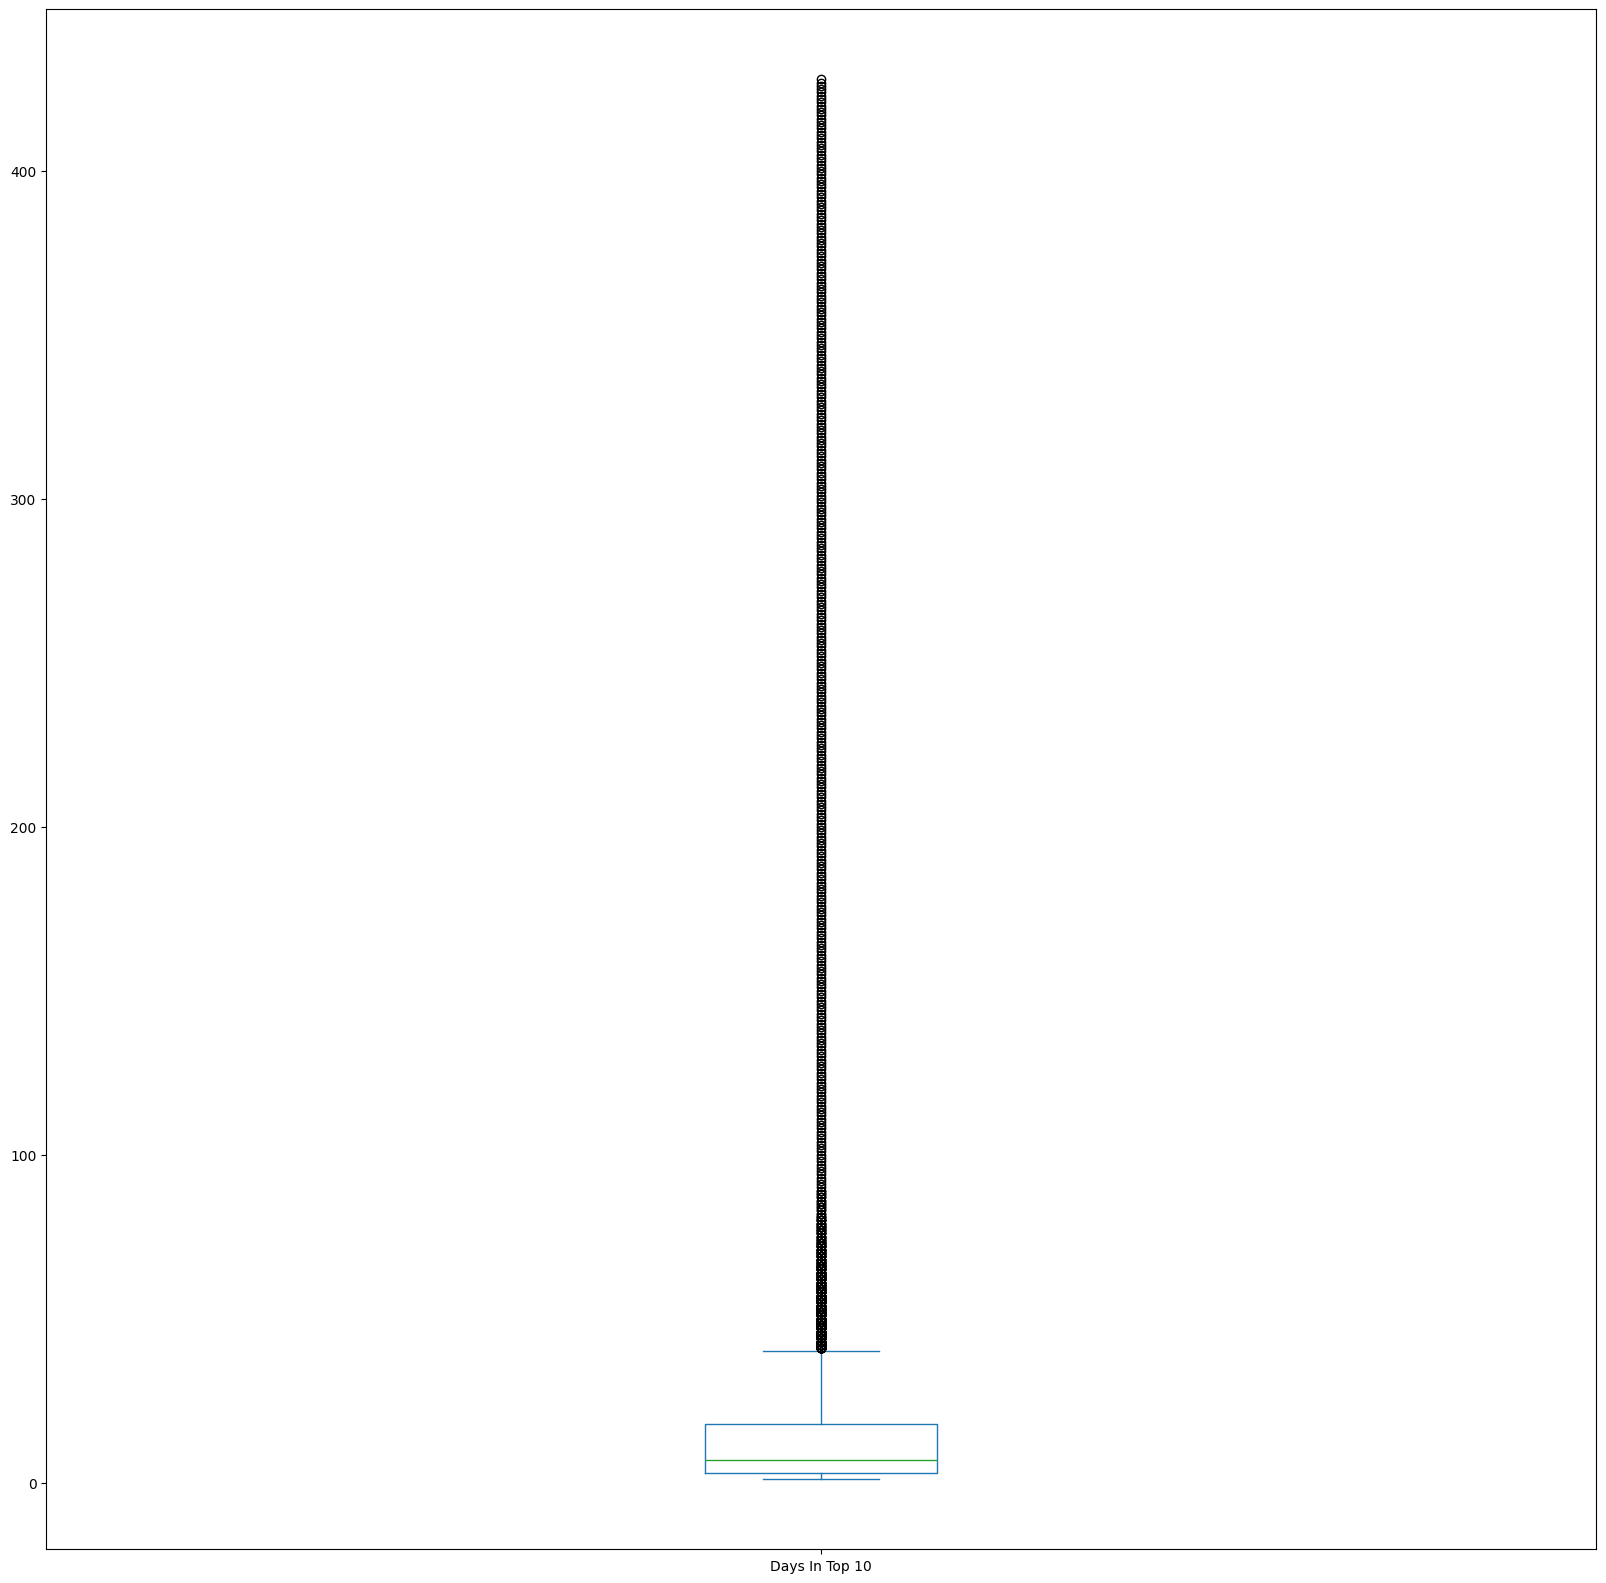

In [60]:
df_Netflix['Days In Top 10'].plot.box(figsize=(20,20))

In [61]:
df_Netflix['Days In Top 10'].describe()

count    7100.000000
mean       24.123662
std        58.473789
min         1.000000
25%         3.000000
50%         7.000000
75%        18.000000
max       428.000000
Name: Days In Top 10, dtype: float64

<Axes: ylabel='Frequency'>

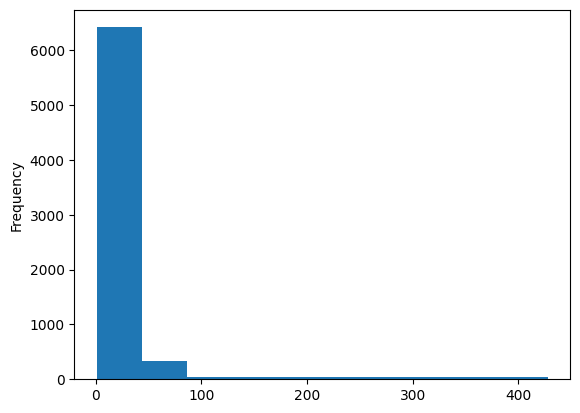

In [62]:
df_Netflix['Days In Top 10'].plot.hist()

Calcular IQR e repassar codigo
15*1.5 + sup (18) = 22,5 + 18 = 40,5(limite superior boxplot)

In [74]:
df_outliers_days_top = df_Netflix[df_Netflix['Days In Top 10'] >= 41]
len(df_outliers_days_top)

743

In [75]:
df_outliers_days_top['Title'].unique()

array(['Ozark', 'Outer Banks', 'Cocomelon', 'The Queenâ\x80\x99s Gambit',
       'Cobra Kai', 'Bridgerton', 'iCarly', 'Ginny & Georgia',
       'Who Killed Sara?', 'Lucifer', 'Manifest', 'Virgin River',
       'All American', 'Shameless', 'Squid Game', 'Maid', 'Tiger King',
       'The Queen of Flow', 'Emily in Paris', 'The Witcher',
       'Too Hot to Handle', 'Sweet Magnolias', 'Love is Blind'],
      dtype=object)

In [76]:
df_outliers_days_top['Title'].value_counts()

Title
Cocomelon               388
Ozark                    49
Cobra Kai                41
Manifest                 40
The Queenâs Gambit     33
Outer Banks              32
Squid Game               26
All American             26
Bridgerton               18
Lucifer                  17
Virgin River             15
Maid                      9
Emily in Paris            8
Too Hot to Handle         7
Love is Blind             6
The Witcher               5
Sweet Magnolias           5
Ginny & Georgia           4
Tiger King                4
The Queen of Flow         4
Who Killed Sara?          2
Shameless                 2
iCarly                    2
Name: count, dtype: int64

<Axes: >

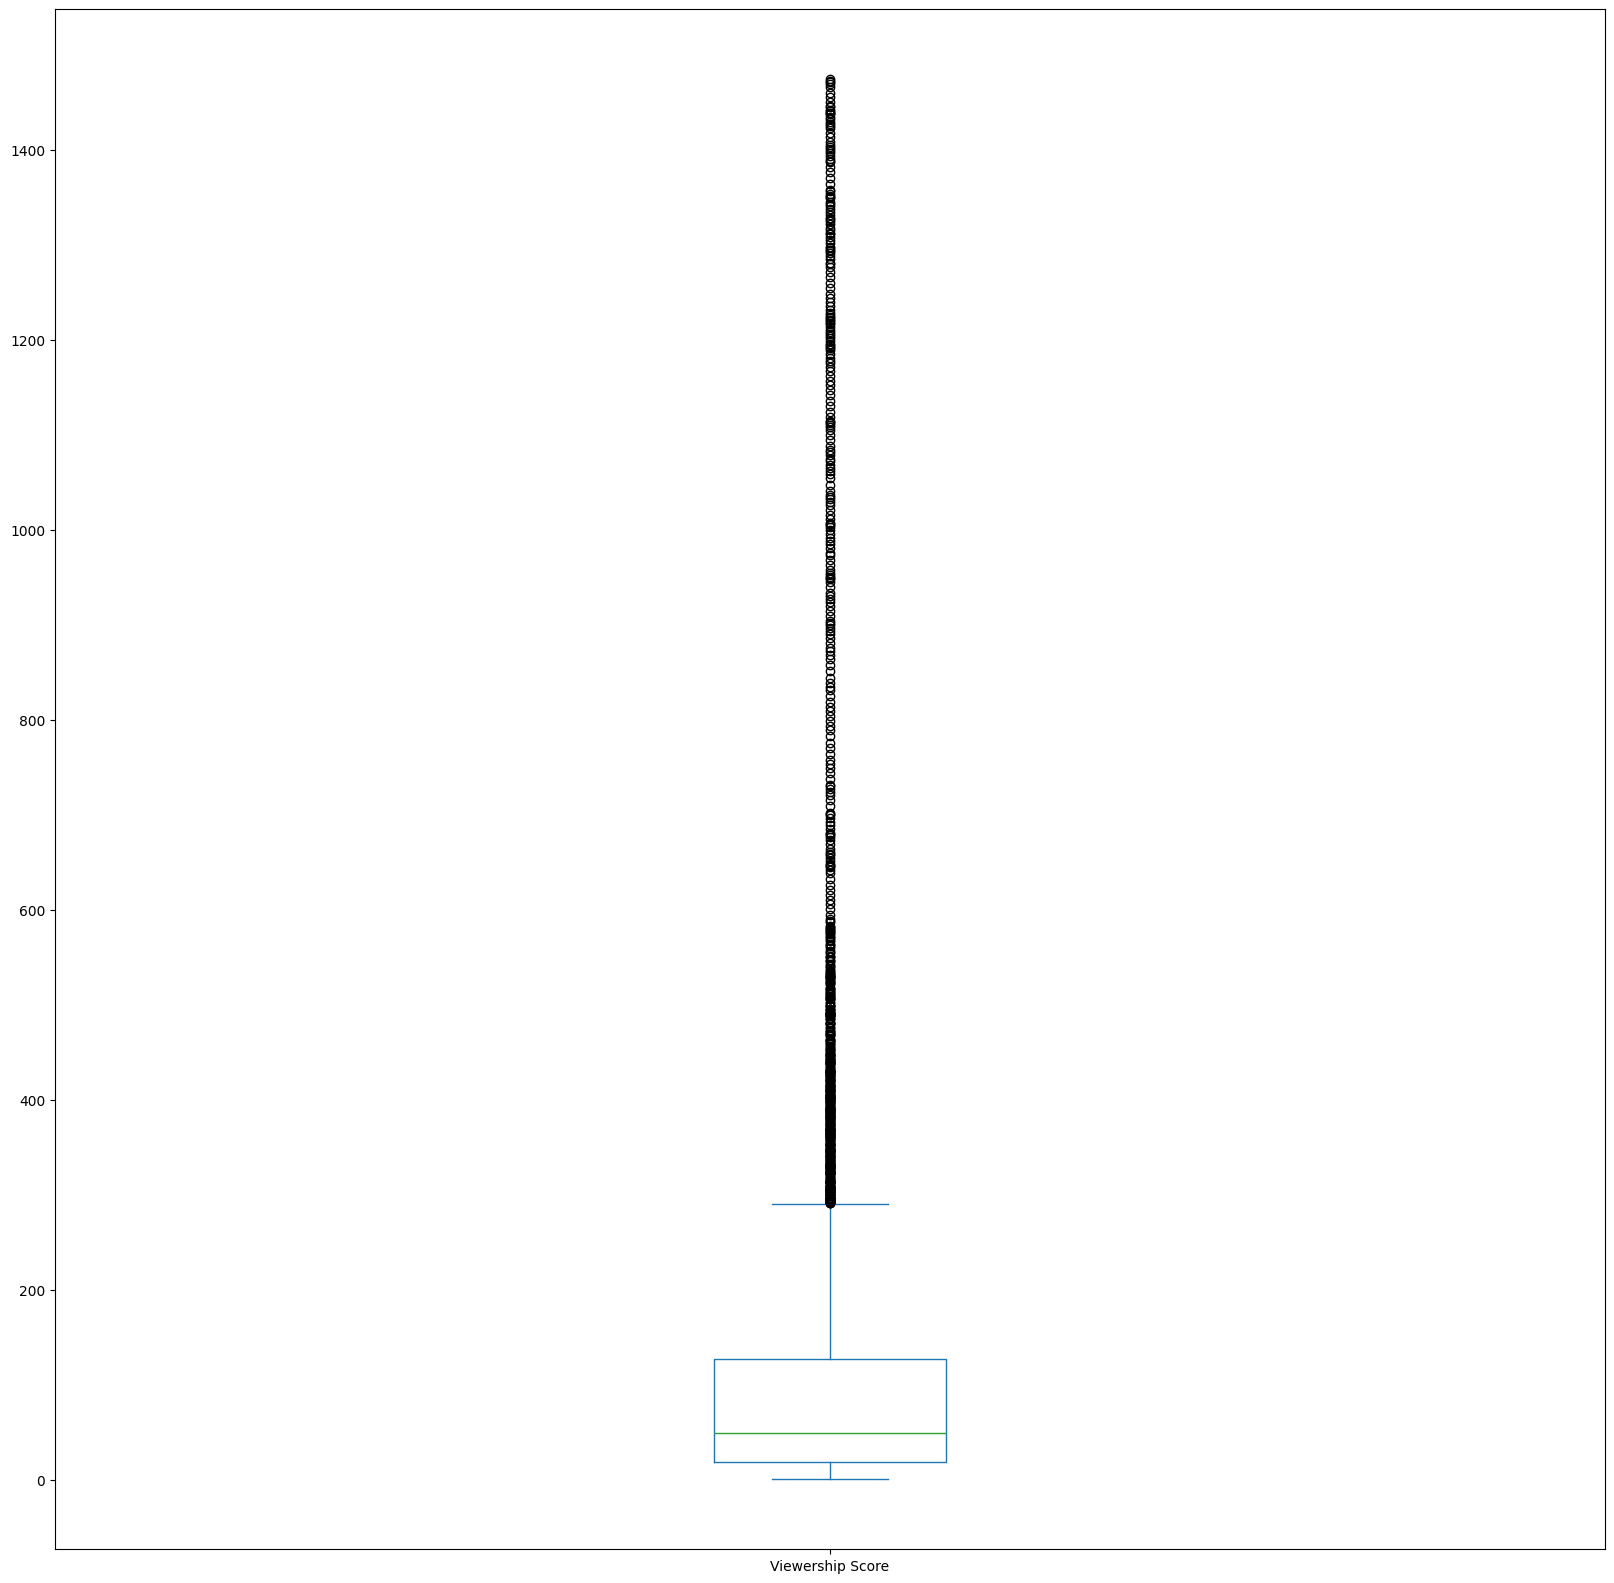

In [77]:
df_Netflix['Viewership Score'].plot.box(figsize=(20,20))

In [78]:
df_Netflix['Viewership Score'].describe()

count    7100.000000
mean      122.790141
std       213.861642
min         1.000000
25%        19.000000
50%        50.000000
75%       128.000000
max      1474.000000
Name: Viewership Score, dtype: float64

IQR = 
291,5 limite superior

In [79]:
df_outliers_VScore = df_Netflix[df_Netflix['Viewership Score'] >= 292]

In [80]:
df_outliers_VScore["Viewership Score"].unique()

array([ 292,  295,  300,  301,  296,  303,  310,  317,  325,  333,  340,
        347,  353,  359,  364,  367,  371,  376,  381,  385,  389,  391,
        392,  395,  397,  399,  401,  402,  403,  404,  405,  406,  410,
        413,  417,  421,  425,  430,  435,  439,  441,  442,  443,  445,
        446,  305,  314,  323,  332,  354,  362,  293,  365,  369,  370,
        299,  294,  307,  315,  297,  330,  337,  346,  356,  302,  304,
        374,  383,  316,  319,  398,  324,  411,  335,  416,  339,  420,
        342,  345,  424,  426,  349,  427,  352,  428,  429,  358,  361,
        431,  363,  432,  366,  375,  378,  380,  382,  384,  386,  388,
        393,  412,  419,  434,  447,  450,  453,  456,  459,  463,  470,
        477,  485,  488,  492,  308,  496,  500,  322,  506,  508,  510,
        513,  326,  514,  518,  524,  529,  533,  537,  541,  328,  546,
        550,  555,  560,  564,  568,  573,  581,  588,  595,  601,  606,
        611,  616,  331,  621,  626,  334,  633,  6

In [82]:
df_outliers_VScore["Title"].value_counts()

Title
Cocomelon                       327
Manifest                         50
Cobra Kai                        42
The Queenâs Gambit             41
Ozark                            38
Squid Game                       36
Outer Banks                      31
Bridgerton                       26
All American                     24
Lucifer                          19
Virgin River                     16
Ginny & Georgia                  13
Sweet Magnolias                   9
Maid                              7
Tiger King                        7
Tiger King: Murder, Mayhem …      6
Love is Blind                     4
Too Hot to Handle                 2
Name: count, dtype: int64

In [87]:
len(df_outliers_VScore)

698

In [86]:
df_outliers_days_top['Title'].isin(df_outliers_VScore['Title']).sum()


720

In [88]:
df_outliers_VScore['Title'].isin(df_outliers_days_top['Title']).sum()

692

possivel verificar que os outlier de ambos os graficos tem conexão 

In [66]:
df_Netflix.Title.value_counts()

Title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: count, Length: 645, dtype: int64

<Axes: xlabel='Type'>

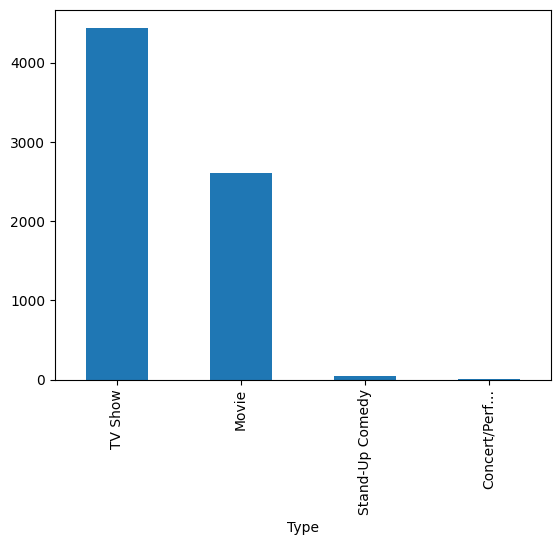

In [67]:
df_Netflix.Type.value_counts().plot.bar()

<Axes: ylabel='Frequency'>

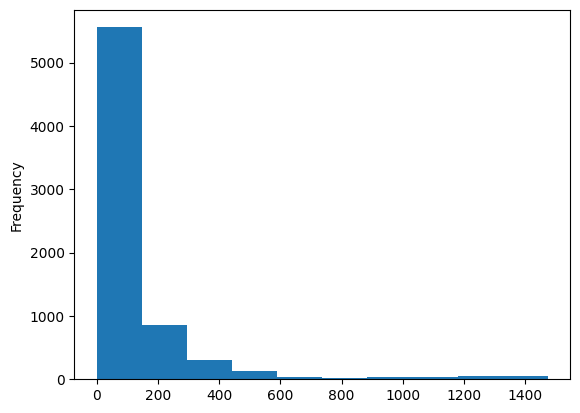

In [68]:
df_Netflix['Viewership Score'].plot.hist()

In [69]:
df_Netflix[df_Netflix['Viewership Score'] == df_Netflix['Viewership Score'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",428,1474
